In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

In [3]:
df=pd.read_csv("takehome_users.csv",encoding='latin-1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df.shape

(12000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [8]:
df1=pd.read_csv("takehome_user_engagement.csv")
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [10]:
df1.shape

(207917, 3)

In [11]:
df1.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [12]:
df.rename(columns={'object_id':'user_id'},inplace=True)

In [13]:
merge_data = pd.merge(df, df1,on='user_id',how='right')
merge_data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

In [14]:
import datetime as datetime


In [15]:
merge_data['date'] = merge_data['time_stamp'].astype('datetime64')
merge_data['week'] = merge_data['date'].dt.isocalendar().week
merge_data['year'] = merge_data['date'].dt.isocalendar().year
merge_data['month'] = merge_data['date'].dt.month

In [16]:
merge_data.head(2)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,date,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,2014-04-22 03:53:30,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1,2013-11-15 03:45:04,46,2013,11


In [17]:
groupby_week = merge_data.groupby(['user_id','week','month','year'])['visited'].count().reset_index()


In [18]:
groupby_week.head()


,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,12,2014,1
2,2,2,1,2014,1
3,2,6,2,2014,3
4,2,7,2,2014,2


In [19]:
adopted_user = groupby_week.loc[groupby_week['visited'] >=3]
len(adopted_user)


32754

In [20]:
adopted_user.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32754 entries, 3 to 75916
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  32754 non-null  int64 
 1   week     32754 non-null  UInt32
 2   month    32754 non-null  int64 
 3   year     32754 non-null  UInt32
 4   visited  32754 non-null  int64 
dtypes: UInt32(2), int64(3)
memory usage: 1.3 MB


In [21]:
groupby_week['adopted_user'] = groupby_week['visited'].apply(lambda x: 1 if x >= 3 else 0)


In [22]:
groupby_week.head()


,user_id,week,month,year,visited,adopted_user
0,1,17,4,2014,1,0
1,2,1,12,2014,1,0
2,2,2,1,2014,1,0
3,2,6,2,2014,3,1
4,2,7,2,2014,2,0


In [23]:
df3 = groupby_week[(groupby_week['visited']>=3)]
df3.head(2)

,user_id,week,month,year,visited,adopted_user
3,2,6,2,2014,3,1
17,10,1,1,2014,4,1


In [24]:
adopted_count=df3[['user_id','adopted_user']][df3['adopted_user']==1].groupby('user_id').count()
print('Number of adopted users:',len(adopted_count))


Number of adopted users: 1416


# Data Visualization

In [25]:
import matplotlib.pyplot as plt
import numpy as np

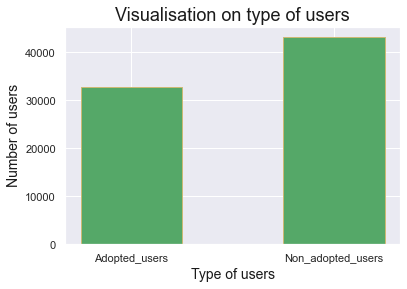

In [32]:
x = ['Adopted_users','Non_adopted_users']
y = [(groupby_week.adopted_user.value_counts()[1]),(groupby_week.adopted_user.value_counts()[0])]
plt.bar(x,y,color='g',edgecolor='y',width=0.5)

plt.xlabel("Type of users",color='k',fontsize=14)
plt.ylabel("Number of users",color='k',fontsize=14)
plt.title("Visualisation on type of users",color='k',fontsize=18)
plt.show()    

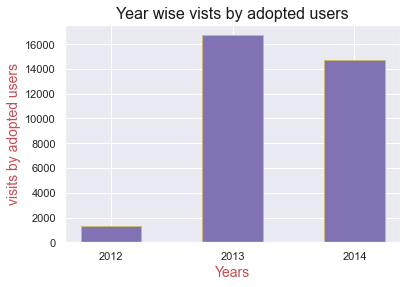

In [36]:
x = ['2012','2013','2014']
q= df3.year.value_counts()
y = [q[2012],q[2013],q[2014]]
plt.bar(x,y,color='m',edgecolor='y',width=0.5)

plt.xlabel("Years",color='r',fontsize=14)
plt.ylabel("visits by adopted users",color='r',fontsize=14)
plt.title("Year wise vists by adopted users",color='k',fontsize=16)
plt.show()

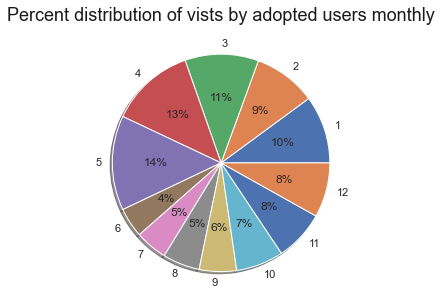

In [37]:
q = df3.groupby(['month']).size().values
p = df3.groupby(['month']).size().index
y = np.array(q)
x = np.array(p)
plt.figure(figsize=(5,5))
plt.pie(y, labels = x, autopct='%1.0f%%',shadow=True)
plt.title("Percent distribution of vists by adopted users monthly", color = 'k',fontsize=18)
plt.show()

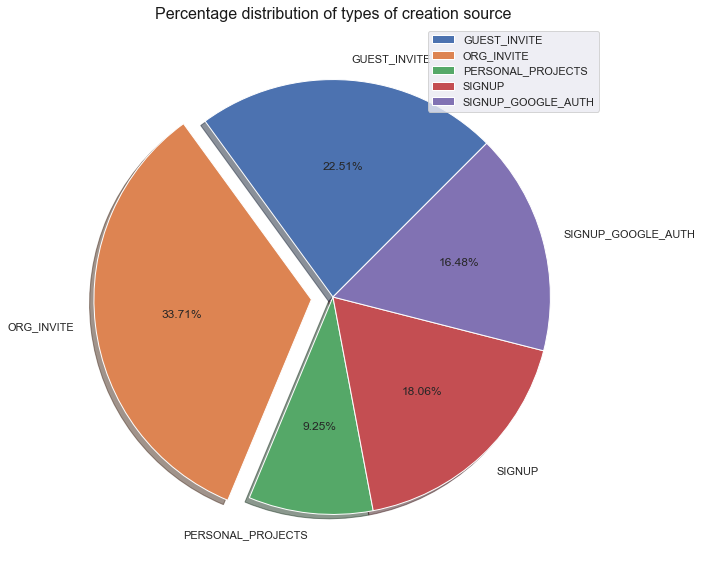

In [38]:
q = merge_data.groupby(['creation_source']).size().values
p = merge_data.groupby(['creation_source']).size().index
y = np.array(q)
x = np.array(p)
plt.figure(figsize=(10,10))
plt.pie(y, labels = x,explode= (0,0.1,0,0,0), autopct='%1.2f%%',shadow=True,startangle=45)
plt.legend()
plt.title("Percentage distribution of types of creation source", color = 'k',fontsize=16)
plt.show()

Here the Pie Chart clearly shows that the factors which higly contributes to adopte the users

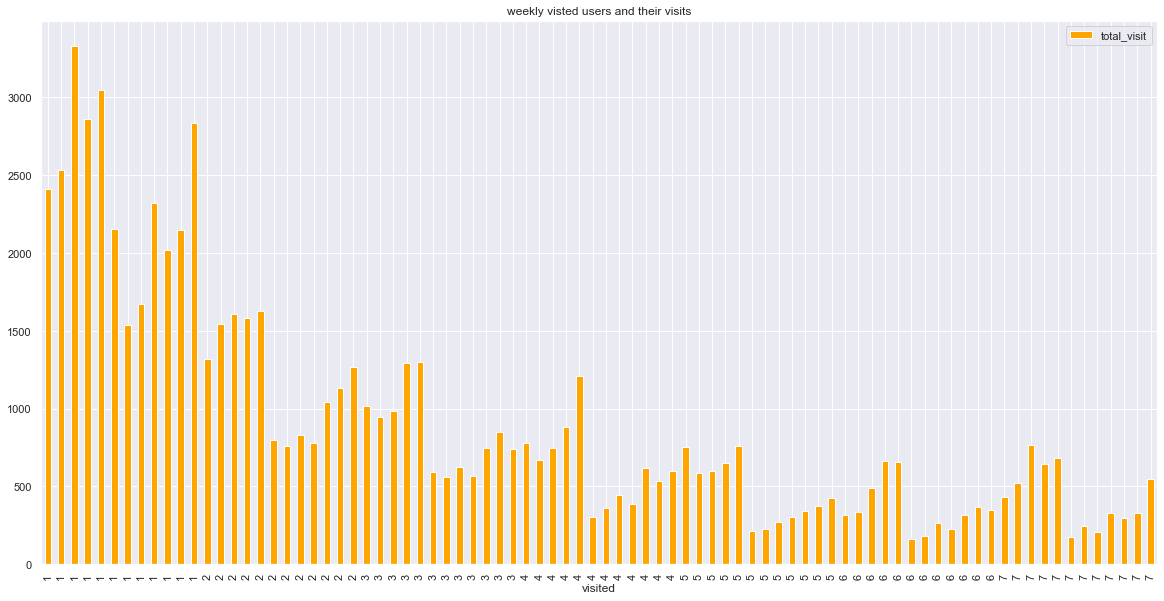

In [39]:
df5=groupby_week
df5= df5.groupby(['visited','month']).size()
df5 = df5.to_frame(name = 'total_visit').reset_index()
t= df5[df5['total_visit']>=3]
t.plot.bar(x='visited', y='total_visit', figsize=(20,10), title="weekly visted users and their visits",color='orange')
plt.show()

Total no of adopted users are 1416 where org_invite contributes higher no of adopted users and personal projects contributes in less nos